# The shortest path visualization

**Notes:** This portfolio was re-worked by [Raynaldi Pratama](https://www.linkedin.com/in/raynaldiprtm/) as part of his learning journey in data science. The codes written below were forked from its original source: [Automating GIS-processes 2020](https://autogis-site.readthedocs.io/en/latest/) (open access course) provided by **Henrikki Tenkanen** & **Vuokko Heikinheimo**, Department of Geosciences and Geography, University of Helsinki.

## Get the network

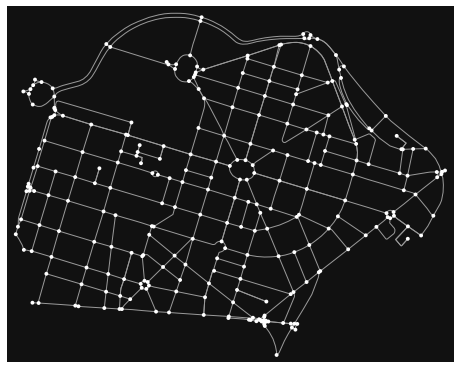

In [13]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
from pyproj import CRS

place_name = "Abando, Bilbao, Spain"

graph = ox.graph_from_place(place_name, network_type="drive")

fig, ax = ox.plot_graph(graph)

In [3]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [4]:
# Check columns
edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'length',
       'geometry', 'access', 'junction', 'bridge', 'tunnel'],
      dtype='object')

In [5]:
# Check CRS
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
edges.head()

osmid  oneway lanes  \
u         v         key                                                   
102565389 245939347 0                           359617709   False     4   
          246852195 0    [902623938, 812798732, 22926407]    True     3   
186149360 518648507 0                            41902259    True   NaN   
          522519117 0                           432527153    True     3   
243084764 245940764 0                            28463164    True   NaN   

                                                                      name  \
u         v         key                                                      
102565389 245939347 0    Gran Vía Don Diego López de Haro / On Diego Lo...   
          246852195 0       Plaza de Federico Moyúa / Federico Moyua plaza   
186149360 518648507 0                               Abandoibarra etorbidea   
          522519117 0         Euskalduna biribilgunea - Rotonda Euskalduna   
243084764 245940764 0          Paseo de Uribitarte / Uribitarte pasealekua   

                             highway maxspeed   length  \
u         v         key                                  
102565389 245939347 0        primary       50   61.819   
          246852195 0        primary       50   80.349   
186149360 518648507 0    residential      NaN  336.727   
          522519117 0       tertiary      NaN   35.839   
243084764 245940764 0    residential       30  123.335   

                                                                  geometry  \
u         v         key                                                      
102565389 245939347 0    LINESTRING (-2.93566 43.26316, -2.93604 43.263...   
          246852195 0    LINESTRING (-2.93566 43.26316, -2.93568 43.263...   
186149360 518648507 0    LINESTRING (-2.94494 43.26583, -2.94486 43.265...   
          522519117 0    LINESTRING (-2.94494 43.26583, -2.94495 43.265...   
243084764 245940764 0    LINESTRING (-2.92446 43.26293, -2.92450 43.262...   

                        access junction bridge tunnel  
u         v         key                                
102565389 245939347 0      NaN      NaN    NaN    NaN  
          246852195 0      NaN      NaN    NaN    NaN  
186149360 518648507 0      NaN      NaN    NaN    NaN  
          522519117 0      NaN      NaN    NaN    NaN  
243084764 245940764 0      NaN      NaN    NaN    NaN

In [24]:
# Project the data
graph_proj = ox.project_graph(graph)

# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(
    graph_proj, nodes=True, edges=True
)

In [25]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [26]:
edges_proj.head()

osmid  oneway lanes  \
u         v          key                                                   
102565389 245939347  0                           359617709   False     4   
          246852195  0    [902623938, 812798732, 22926407]    True     3   
245939347 102565389  0                           359617709   False     4   
          5245592198 0                           359617709   False     4   
          245940166  0                           542617856    True     2   

                                                                       name  \
u         v          key                                                      
102565389 245939347  0    Gran Vía Don Diego López de Haro / On Diego Lo...   
          246852195  0       Plaza de Federico Moyúa / Federico Moyua plaza   
245939347 102565389  0    Gran Vía Don Diego López de Haro / On Diego Lo...   
          5245592198 0    Gran Vía Don Diego López de Haro / On Diego Lo...   
          245940166  0              Calle Iparraguirre / Iparraguirre kalea   

                              highway maxspeed   length  \
u         v          key                                  
102565389 245939347  0        primary       50   61.819   
          246852195  0        primary       50   80.349   
245939347 102565389  0        primary       50   61.819   
          5245592198 0        primary       50  113.028   
          245940166  0    residential      NaN  116.585   

                                                                   geometry  \
u         v          key                                                      
102565389 245939347  0    LINESTRING (505221.487 4790040.661, 505190.655...   
          246852195  0    LINESTRING (505221.487 4790040.661, 505220.058...   
245939347 102565389  0    LINESTRING (505162.283 4790058.873, 505178.852...   
          5245592198 0    LINESTRING (505162.283 4790058.873, 505146.153...   
          245940166  0    LINESTRING (505162.283 4790058.873, 505186.836...   

                         access junction bridge tunnel  
u         v          key                                
102565389 245939347  0      NaN      NaN    NaN    NaN  
          246852195  0      NaN      NaN    NaN    NaN  
245939347 102565389  0      NaN      NaN    NaN    NaN  
          5245592198 0      NaN      NaN    NaN    NaN  
          245940166  0      NaN      NaN    NaN    NaN

In [27]:
CRS(edges_proj.crs).to_epsg()

32630

## Analyzing the network properties

In [30]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist="euclidean")
stats

{'n': 271,
 'm': 480,
 'k_avg': 3.5424354243542435,
 'intersection_count': 265,
 'streets_per_node_avg': 3.302583025830258,
 'streets_per_node_counts': {0: 0, 1: 6, 2: 4, 3: 167, 4: 91, 5: 2, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.02214022140221402,
  2: 0.014760147601476014,
  3: 0.6162361623616236,
  4: 0.33579335793357934,
  5: 0.007380073800738007,
  6: 0.0036900369003690036},
 'edge_length_total': 41297.39000000004,
 'edge_length_avg': 86.03622916666676,
 'street_length_total': 36965.490000000034,
 'street_length_avg': 85.76679814385159,
 'street_segments_count': 431,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0246713501323186,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [31]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

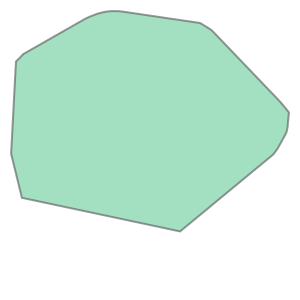

In [32]:
# Show output
convex_hull

In [36]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)

extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                    271
m                                                                                    480
k_avg                                                                           3.542435
intersection_count                                                                   265
streets_per_node_avg                                                            3.302583
streets_per_node_counts                    {0: 0, 1: 6, 2: 4, 3: 167, 4: 91, 5: 2, 6: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.02214022140221402, 2: 0.01476014...
edge_length_total                                                               41297.39
edge_length_avg                                                                86.036229
street_length_total                                                             36965.49
street_length_avg                                                              85.766798
street_segments_count

## Shortest path analysis

### Origin and destination points

In [37]:
# Set place name
place = "Edificio Euskalduna"

# Geocode the place name
geocoded_place = ox.geocode_to_gdf(place)

# Check the result
geocoded_place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-2.94583 43.26571, -2.94576 43.26565...",43.266058,43.265561,-2.945059,-2.945825,129652190,way,171880900,43.265856,-2.94541,"Edificio Euskalduna, Euskalduna biribilgunea -...",building,yes,0.201


In [39]:
# Re-project
geocoded_place.to_crs(CRS(edges_proj.crs), inplace=True)

# Get centroid as shapely point
origin = geocoded_place["geometry"].centroid.values[0]

print(origin)

POINT (504425.6899163825 4790334.323680355)


In [40]:
nodes_proj.head()

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
102565389,4.790041e+06,505221.486729,3,-2.935664,43.263157,NaN,NaN,POINT (505221.487 4790040.661)
245939347,4.790059e+06,505162.283110,4,-2.936393,43.263322,NaN,NaN,POINT (505162.283 4790058.873)
246852195,4.789983e+06,505264.895481,3,-2.935130,43.262633,NaN,NaN,POINT (505264.895 4789982.503)
186149360,4.790337e+06,504468.625070,4,-2.944938,43.265827,NaN,NaN,POINT (504468.625 4790336.548)
518648507,4.790548e+06,504708.375512,4,-2.941982,43.267734,NaN,NaN,POINT (504708.376 4790548.489)


In [41]:
# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj["x"].max()

# Easternmost point
destination = nodes_proj.loc[nodes_proj["x"] == maxx, "geometry"].values[0]

print(destination)

POINT (506144.0055301834 4790021.888626047)


### Nearest node

In [42]:
# Get origin x and y coordinates
orig_xy = (origin.y, origin.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

In [43]:
# Find the node in the graph that is closest to the origin point
# (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method="euclidean")
orig_node_id

186149360

In [44]:
# Find the node in the graph that is closest to the target point
# (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method="euclidean")
target_node_id

309852237

In [46]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id
# (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame(
    [orig_node, target_node], geometry="geometry", crs=nodes_proj.crs
)

od_nodes.head()

,y,x,street_count,lon,lat,highway,ref,geometry
186149360,4.790337e+06,504468.62507,4,-2.944938,43.265827,NaN,NaN,POINT (504468.625 4790336.548)
309852237,4.790022e+06,506144.00553,3,-2.924298,43.262981,NaN,NaN,POINT (506144.006 4790021.889)


### Routing

In [47]:
# Calculate the shortest path
route = nx.shortest_path(
    G=graph_proj, source=orig_node_id,
    target=target_node_id, weight="length"
)

# Show what we have
print(route)

[186149360, 518648507, 518648535, 517795632, 4320879876, 517795570, 245940550, 245939609, 245940166, 3015894288, 1854432607, 245940169, 4666933155, 245940170, 245940544, 247071044, 245940746, 245940174, 245940228, 1131000428, 309852237]


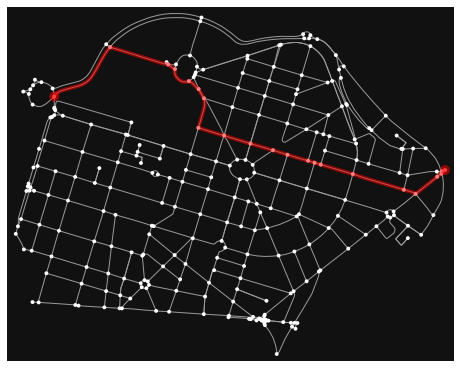

In [48]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)